In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as stats
import os

sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, palette="binary")
formatter = ticker.ScalarFormatter(useMathText=True)

# Binary data

In [3]:
manila = pd.read_csv('manila_binary/measures.csv')
our = pd.read_csv('our_approach_binary/measures.csv')
aequitas = pd.read_csv('aequitas_binary/measures.csv')
manila_time = pd.read_fwf('manila_binary/times.txt', header=None)
manila["time"] = manila_time
our_time = pd.read_fwf('our_approach_binary/times.txt', header=None)
our['time'] = our_time
aequitas_time = pd.read_fwf('aequitas_binary/times.txt', header=None)
aequitas['time'] = aequitas_time
manila['approach'] = 'Manila'
aequitas['approach'] = 'Aequitas'
our['approach'] = 'Our approach'
full = pd.concat([manila, aequitas, our])

## CPU Consumption

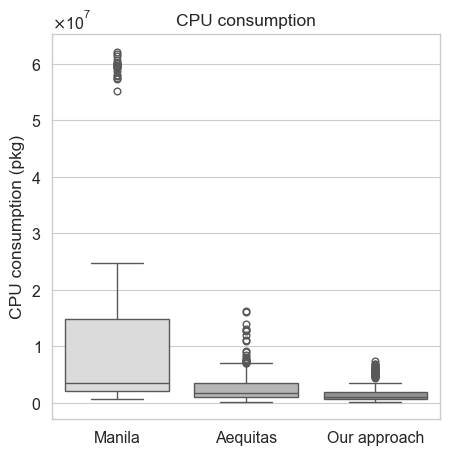

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(data=full, x='approach', y='pkg', hue='approach', ax=ax)
ax.set_ylabel('CPU consumption (pkg)')
ax.set_xlabel('')
ax.yaxis.set_major_formatter(formatter)
plt.title('CPU consumption')
plt.savefig('pkg.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
stats.kruskal(manila['pkg'], our['pkg'], aequitas['pkg'])

KruskalResult(statistic=190.4712127039268, pvalue=4.3621608997303524e-42)

## Execution time

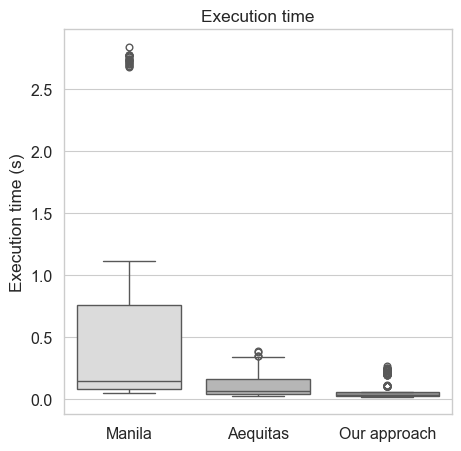

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(data=full, x="approach", y="time", hue="approach", ax=ax)
ax.set_ylabel("Execution time (s)")
ax.set_xlabel("")
plt.title("Execution time")
plt.savefig("time.png", dpi=300, bbox_inches="tight")
plt.show()

In [7]:
stats.kruskal(manila['time'], our['time'], aequitas['time'])

KruskalResult(statistic=246.77156423500384, pvalue=2.5955875422184498e-54)

# Binary and multi-class datasets

In [4]:
manila = pd.read_csv("manila_full/measures.csv")
our = pd.read_csv("our_approach_full/measures.csv")
manila_time = pd.read_fwf("manila_full/times.txt", header=None)
manila["time"] = manila_time
our_time = pd.read_fwf("our_approach_full/times.txt", header=None)
our["time"] = our_time
manila["approach"] = "Manila"
our["approach"] = "Our approach"
full = pd.concat([manila, our])

## CPU consumption

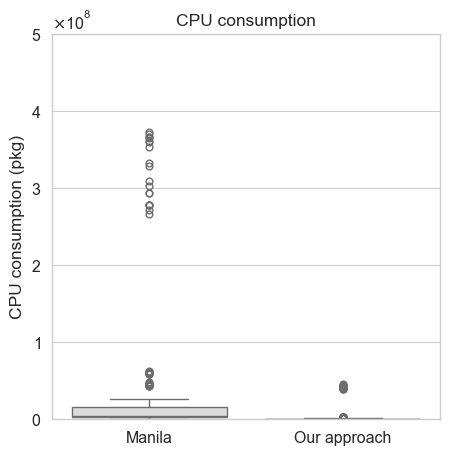

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(data=full, x="approach", y="pkg", hue="approach", ax=ax)
ax.set_ylabel("CPU consumption (pkg)")
ax.set_xlabel("")
ax.yaxis.set_major_formatter(formatter)
plt.ylim(0, 0.5*10**9)
plt.title("CPU consumption")
plt.show()

In [10]:
stats.kruskal(manila["pkg"], our["pkg"])

KruskalResult(statistic=532.1861924951079, pvalue=9.447842142630729e-118)

## Training time

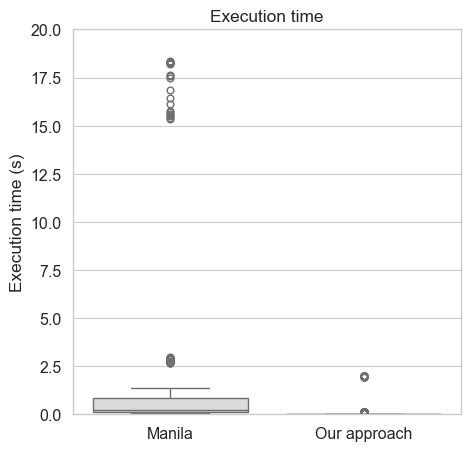

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(data=full, x="approach", y="time", hue="approach", ax=ax)
ax.set_ylabel("Execution time (s)")
ax.set_xlabel("")
plt.ylim(0, 20)
plt.title("Execution time")
plt.savefig("time.png", dpi=300, bbox_inches="tight")
plt.show()

In [12]:
stats.kruskal(manila["time"], our["time"])

KruskalResult(statistic=566.3428192133081, pvalue=3.506357979286234e-125)

## Model training time

C:\Users\giord\AppData\Local\Temp\ipykernel_31140\4167127974.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_measures = pd.concat([model_measures, pd.read_csv(f"model_training_grid_search_full/measures/{file}")])


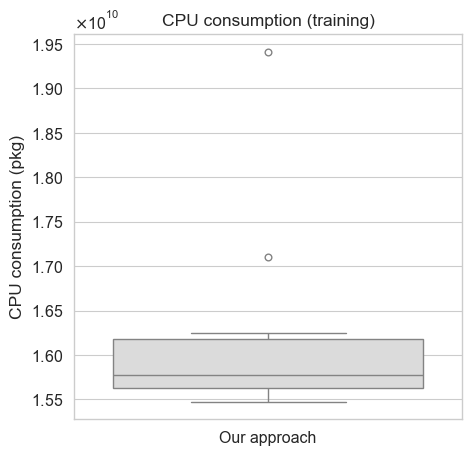

In [32]:
model_measures = pd.DataFrame()
for file in os.listdir("model_training_grid_search_full/measures/"):
  model_measures = pd.concat([model_measures, pd.read_csv(f"model_training_grid_search_full/measures/{file}")])

model_measures['model'] = 'Our approach'
fig, ax = plt.subplots(figsize=(5, 5))
ax.yaxis.set_major_formatter(formatter)
sns.boxplot(data=model_measures, x="model", y="pkg", ax=ax)
ax.set_ylabel("CPU consumption (pkg)")
ax.set_xlabel("")
plt.title("CPU consumption (training)")
plt.show()

C:\Users\giord\AppData\Local\Temp\ipykernel_31140\3985786680.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([""])


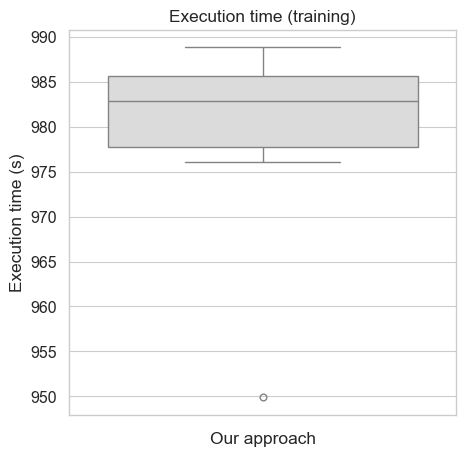

In [31]:
model_times = pd.DataFrame()
for file in os.listdir("model_training_grid_search_full/times/"):
    model_times = pd.concat(
        [
            model_times,
            pd.read_fwf(f"model_training_grid_search_full/times/{file}", header=None),
        ], axis=0
    )
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(data=model_times, ax=ax)
ax.set_ylabel("Execution time (s)")
ax.set_xlabel("Our approach")
ax.set_xticklabels([""])
plt.title("Execution time (training)")
plt.show()

## Prediction comparison

In [21]:
def map_values(x):
  if abs(x) > 0.2:
    return 1
  else: 
    return 0

def map_values_eo(x):
  if abs(x) > 0.15:
    return 1
  else: 
    return 0

manila = pd.DataFrame()
for file in os.listdir('manila_full/manila_results/'):
  manila = pd.concat([manila, pd.read_csv(f'manila_full/manila_results/{file}', index_col=0)[['stat_par', 'eq_odds', 'ao']]])
manila['stat_par'] = manila['stat_par'].apply(map_values)
manila['eq_odds'] = manila['eq_odds'].apply(map_values_eo)
manila['ao'] = manila['ao'].apply(map_values)

In [26]:
our = pd.DataFrame()
for file in os.listdir('our_approach_full/our_approach_results/'):
    our = pd.concat(
        [
            our,
            pd.read_csv(f"our_approach_full/our_approach_results/{file}", index_col=0)
        ]
    )

In [15]:
from sklearn.metrics import accuracy_score

In [27]:
print('Statistical parity', accuracy_score(manila['stat_par'], our['0']))

Statistical parity 0.8260869565217391


In [28]:
print("Equal opportunity", accuracy_score(manila["eq_odds"], our["1"]))

Equal opportunity 0.6956521739130435


In [29]:
print("Average odds", accuracy_score(manila["ao"], our["2"]))

Average odds 0.6086956521739131


## Aequitas

In [40]:
our_bin = pd.DataFrame()
for file in os.listdir("our_approach_binary/our_approach_results/"):
    our_bin = pd.concat(
        [
            our_bin,
            pd.read_csv(f"our_approach_binary/our_approach_results/{file}", index_col=0),
        ]
    )

In [34]:
aequitas = pd.DataFrame(columns=['sp', 'eo', 'ao'])
for file in os.listdir('aequitas_binary/aequitas_results/'):
    tmp = pd.read_csv(f"aequitas_binary/aequitas_results/{file}", index_col=0)[
        ["attribute_value","tpr", "fpr", "pprev"]
    ]
    aequitas = pd.concat(
        [
            aequitas,
            pd.DataFrame(
                {
                    "sp": [
                        tmp[tmp["attribute_value"] == 0]["pprev"].values[0]
                        - tmp[tmp["attribute_value"] == 1]["pprev"].values[0]
                    ],
                    "eo": [
                        tmp[tmp["attribute_value"] == 0]["tpr"].values[0]
                        - tmp[tmp["attribute_value"] == 1]["tpr"].values[0]
                    ],
                    "ao": [
                        ((tmp[tmp["attribute_value"] == 0]["tpr"].values[0]
                        - tmp[tmp["attribute_value"] == 1]["tpr"].values[0]) +
                        (tmp[tmp["attribute_value"] == 0]["fpr"].values[0] 
                         - tmp[tmp["attribute_value"] == 1]["fpr"].values[0]))/2
                    ],
                }
            ),
        ]
    )

C:\Users\giord\AppData\Local\Temp\ipykernel_11776\4005177405.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aequitas = pd.concat(


In [36]:
aequitas['sp'] = aequitas['sp'].apply(map_values)
aequitas['eo'] = aequitas['eo'].apply(map_values_eo)
aequitas['ao'] = aequitas['ao'].apply(map_values)

In [42]:
print('Statistical parity', accuracy_score(aequitas['sp'], our_bin['0']))

Statistical parity 0.5384615384615384


In [44]:
print("Equal opportunity", accuracy_score(aequitas["eo"], our_bin["1"]))

Equal opportunity 0.7692307692307693


In [45]:
print("Average odds", accuracy_score(aequitas["ao"], our_bin["2"]))

Average odds 0.7692307692307693
